<a href="https://colab.research.google.com/github/PrakritiKhatiwada/AICourseworks1/blob/main/258192_PrakritiKhatiwada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries & Load Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load HDI dataset
hdi_df = pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv")   # use your actual file name

STEP 1: Extract Latest Year (2022)

In [4]:
hdi_df["year"].unique()


array([2020, 2021, 2022])

1.2 Filter data for year 2022

In [5]:
hdi_2022_df = hdi_df[hdi_df["year"] == 2022].copy()


1.3 Verify filtered dataset

In [6]:
hdi_2022_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
2,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
5,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
8,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
11,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
14,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


STEP 2: Data Exploration

2.1 Display first 10 rows

In [7]:
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
2,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
5,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
8,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
11,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
14,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
17,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
20,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
23,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
26,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
29,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


2.2 Count rows and columns

In [8]:
hdi_2022_df.shape


(206, 30)

2.3 Column names and data types

In [9]:
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 2 to 617
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 14 

STEP 3: Missing Values & Data Cleaning

3.1 Check missing values (BEFORE cleaning)

In [10]:
hdi_2022_df.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


3.2 Check duplicate rows

In [11]:
hdi_2022_df.duplicated().sum()


np.int64(0)

3.3 Convert numeric columns stored as text

In [12]:
numeric_columns = ["hdi", "life_expectancy", "gross_inc_percap"]

for col in numeric_columns:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors="coerce")


3.4 Remove duplicate rows

In [13]:
hdi_2022_df = hdi_2022_df.drop_duplicates()


3.5 Handle missing HDI values (drop)

In [14]:
hdi_2022_df = hdi_2022_df.dropna(subset=["hdi"])


3.6 Recheck missing values (AFTER cleaning)

In [15]:
hdi_2022_df.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,11
hdi_m,11
life_expec_f,0


STEP 4: Basic Statistics

4.1 Mean, Median, Standard Deviation

In [16]:
mean_hdi = hdi_2022_df["hdi"].mean()
median_hdi = hdi_2022_df["hdi"].median()
std_hdi = hdi_2022_df["hdi"].std()

mean_hdi, median_hdi, std_hdi


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

4.2 Country with highest HDI

In [17]:
hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()]


,509
Unnamed: 0,5610
iso3,CHE
country,Switzerland
year,2022
hdi,0.967
life_expectancy,84.255
pop_millions,8.740472
hdi_f,0.949369
hdi_m,0.977383
life_expec_f,85.932


4.3 Country with lowest HDI

In [18]:
hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()]


,485
Unnamed: 0,5346
iso3,SOM
country,Somalia
year,2022
hdi,0.38
life_expectancy,56.107
pop_millions,17.597511
hdi_f,0.327083
hdi_m,0.425211
life_expec_f,58.233


STEP 5: Filtering and Sorting

5.1 Filter HDI > 0.800

In [19]:
high_hdi_df = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]


5.2 Sort by GNI per capita (descending)

In [20]:
top_10_gni = high_hdi_df.sort_values(
    by="gross_inc_percap", ascending=False
).head(10)

top_10_gni


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
302,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
428,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
473,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
245,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
308,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
554,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
509,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
392,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
560,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
224,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


STEP 6: Add HDI Category Column

6.1 Define HDI category function

In [21]:
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"


6.2 Apply classification

In [22]:
hdi_2022_df["HDI Category"] = hdi_2022_df["hdi"].apply(classify_hdi)


6.3 Verify classification

In [23]:
hdi_2022_df["HDI Category"].value_counts()


,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


STEP 1: Data Extraction and Saving

1.1 Filter dataset for years 2020–2022

In [24]:
hdi_1b_df = hdi_df[hdi_df["year"].isin([2020, 2021, 2022])].copy()

1.2 Save filtered dataset

In [25]:
hdi_1b_df.to_csv("HDI_problem1B.csv", index=False)


1.3 Preview data

In [26]:
hdi_1b_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
1,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
2,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
3,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
4,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


STEP 2: Data Cleaning

2.1 Check missing values (essential columns)

In [27]:
hdi_1b_df[["hdi", "country", "year"]].isnull().sum()


,0
hdi,8
country,0
year,0


2.2 Convert numeric columns stored as text

In [28]:
numeric_cols = ["hdi", "gross_inc_percap"]

for col in numeric_cols:
    if col in hdi_1b_df.columns:
        hdi_1b_df[col] = pd.to_numeric(hdi_1b_df[col], errors="coerce")


2.3 Remove duplicate rows

In [29]:
hdi_1b_df = hdi_1b_df.drop_duplicates()


2.4 Handle missing HDI values (drop — justified)

In [30]:
hdi_1b_df = hdi_1b_df.dropna(subset=["hdi", "country", "year"])


2.5 Verify cleaning

In [31]:
hdi_1b_df.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,33
hdi_m,33
life_expec_f,0


STEP 3A: Line Chart — HDI Trend (Country-Level)

3A.1 Select five countries

In [32]:
selected_countries = ["Nepal", "India", "China", "United States", "Germany"]


3A.2 Filter selected countries

In [33]:
country_trend_df = hdi_1b_df[hdi_1b_df["country"].isin(selected_countries)]


3A.3 Plot HDI trend

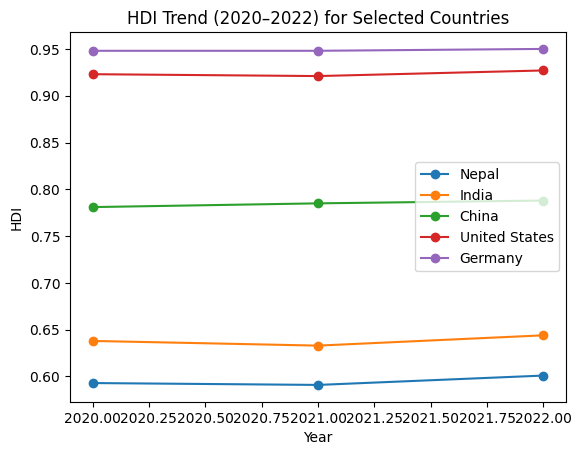

In [34]:
import matplotlib.pyplot as plt
plt.figure()
for country in selected_countries:
    data = country_trend_df[country_trend_df["country"] == country]
    plt.plot(data["year"], data["hdi"], marker='o', label=country)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trend (2020–2022) for Selected Countries")
plt.legend()
plt.show()

STEP 3B-1: Bar Chart — Average HDI by Region (2020–2022)

3B-1.1 Group by region and year

In [36]:
hdi_1b_df.columns

Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

3B-1.2 Plot bar chart

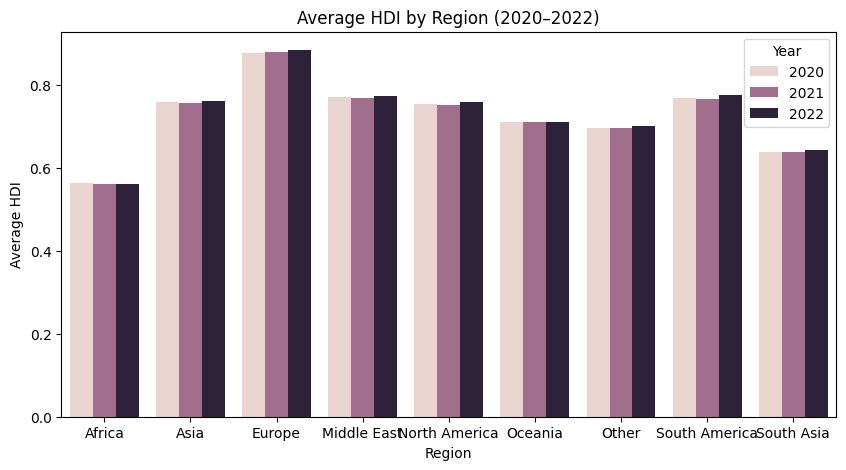

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(
    data=region_avg,
    x='region',
    y='hdi',
    hue='year'
)

plt.title("Average HDI by Region (2020–2022)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.legend(title="Year")
plt.savefig("HDI_Region_Bar.png")
plt.show()

In [39]:
country_to_region = {
    'Afghanistan': 'South Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Middle East',
    'Bangladesh': 'South Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'South Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Costa Rica': 'North America',
    'Côte dIvoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini (Kingdom of)': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hong Kong, China (SAR)': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'South Asia',
    'Indonesia': 'Asia',
    'Iran': 'Middle East',
    'Iraq': 'Middle East',
    'Ireland': 'Europe',
    'Israel': 'Middle East',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Middle East',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Middle East',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Middle East',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'South Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Oceania',
    'Moldova (Republic of)': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'South Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Middle East',
    'Pakistan': 'South Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Middle East',
    'Republic of Korea': 'Asia',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Middle East',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'South Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Middle East',
    'Tajikistan': 'Asia',
    'Tanzania (United Republic of)': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Türkiye': 'Europe',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Middle East',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'South America',
    'Viet Nam': 'Asia',
    'Yemen': 'Middle East',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

hdi_1b_df['region'] = hdi_1b_df['country'].map(country_to_region).fillna('Other')

region_avg = (
    hdi_1b_df
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)


STEP 3B-2: Box Plot — HDI Distribution (2020–2022)

3B-2.1 Prepare data

In [40]:
hdi_2020 = hdi_1b_df[hdi_1b_df["year"] == 2020]["hdi"]
hdi_2021 = hdi_1b_df[hdi_1b_df["year"] == 2021]["hdi"]
hdi_2022 = hdi_1b_df[hdi_1b_df["year"] == 2022]["hdi"]


3B-2.2 Plot box plot

/tmp/ipython-input-2206978207.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hdi_2020, hdi_2021, hdi_2022], labels=["2020", "2021", "2022"])


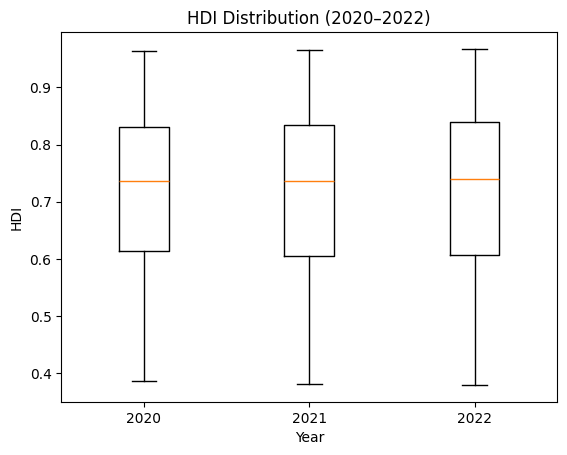

In [42]:
plt.figure()
plt.boxplot([hdi_2020, hdi_2021, hdi_2022], labels=["2020", "2021", "2022"])
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution (2020–2022)")
plt.show()


STEP 3B-3: Scatter Plot — HDI vs GNI per Capita

3B-3.1 Check availability

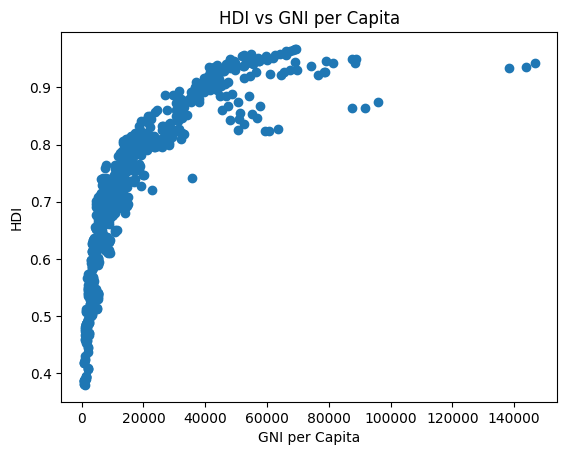

In [43]:
if "gross_inc_percap" in hdi_1b_df.columns:
    plt.figure()
    plt.scatter(hdi_1b_df["gross_inc_percap"], hdi_1b_df["hdi"])
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


STEP 4: Short Analysis Questions (Code-Based)

4.1 Countries with greatest HDI improvement

In [44]:
hdi_change = (
    hdi_1b_df
    .pivot(index="country", columns="year", values="hdi")
)

hdi_change["Change_2020_2022"] = hdi_change[2022] - hdi_change[2020]
hdi_change.sort_values("Change_2020_2022", ascending=False).head()


year,2020,2021,2022,Change_2020_2022
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024


4.2 Countries with HDI decline

In [45]:
hdi_change[hdi_change["Change_2020_2022"] < 0]


year,2020,2021,2022,Change_2020_2022
country,,,,
Afghanistan,0.488,0.473,0.462,-0.026
Angola,0.594,0.590,0.591,-0.003
Australia,0.948,0.949,0.946,-0.002
Belize,0.705,0.698,0.700,-0.005
Brunei Darussalam,0.827,0.824,0.823,-0.004
Bulgaria,0.802,0.796,0.799,-0.003
Burkina Faso,0.446,0.445,0.438,-0.008
Central African Republic,0.389,0.387,0.387,-0.002
Chad,0.396,0.393,0.394,-0.002


4.3 Region with highest & lowest average HDI

In [46]:
region_avg_total = (
    hdi_1b_df
    .groupby("region")["hdi"]
    .mean()
    .sort_values()
)

region_avg_total


,hdi
region,
Africa,0.561430
South Asia,0.639583
Other,0.697080
Oceania,0.709250
North America,0.753683
Asia,0.757106
Middle East,0.769722
South America,0.769900
Europe,0.879106


STEP 1: Create South Asia Subset

1.1 Define South Asian countries

In [47]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

1.2 Filter dataset (use cleaned 2022 or full HDI dataset)

In [49]:
south_asia_df = hdi_df[hdi_df["country"].isin(south_asia_countries)].copy()

1.3 Save dataset (REQUIRED)

In [50]:
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)


1.4 Preview

In [51]:
south_asia_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
1,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
2,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
39,460,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,...,0.907,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993
40,461,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,...,0.908,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834


STEP 2: Composite Development Score

2.1 Convert required columns to numeric

In [52]:
import pandas as pd

data = {
    "country": [
        "Afghanistan", "Bangladesh", "Bhutan", "India",
        "Maldives", "Nepal", "Pakistan", "Sri Lanka"
    ],
    "life_expectancy": [0.50, 0.62, 0.65, 0.60, 0.74, 0.58, 0.59, 0.72],
    "gross_inc_percap": [0.38, 0.55, 0.60, 0.57, 0.82, 0.52, 0.50, 0.68],
    "hdi_rank": [180, 129, 127, 132, 90, 143, 161, 73]
}

df = pd.DataFrame(data)

2.2 Create Composite Score

In [53]:
df["composite_score"] = (
    0.30 * df["life_expectancy"] +
    0.30 * df["gross_inc_percap"]
)

2.3 Rank by Composite Score

In [54]:
df_sorted = df.sort_values("composite_score", ascending=False)
df_sorted

,country,life_expectancy,gross_inc_percap,hdi_rank,composite_score
4,Maldives,0.74,0.82,90,0.468
7,Sri Lanka,0.72,0.68,73,0.420
2,Bhutan,0.65,0.60,127,0.375
1,Bangladesh,0.62,0.55,129,0.351
3,India,0.60,0.57,132,0.351
5,Nepal,0.58,0.52,143,0.330
6,Pakistan,0.59,0.50,161,0.327
0,Afghanistan,0.50,0.38,180,0.264


Rank south asian country

In [55]:
top5 = df_sorted.head(5)
top5

,country,life_expectancy,gross_inc_percap,hdi_rank,composite_score
4,Maldives,0.74,0.82,90,0.468
7,Sri Lanka,0.72,0.68,73,0.420
2,Bhutan,0.65,0.60,127,0.375
1,Bangladesh,0.62,0.55,129,0.351
3,India,0.60,0.57,132,0.351


2.4 Horizontal bar chart (Top 5)

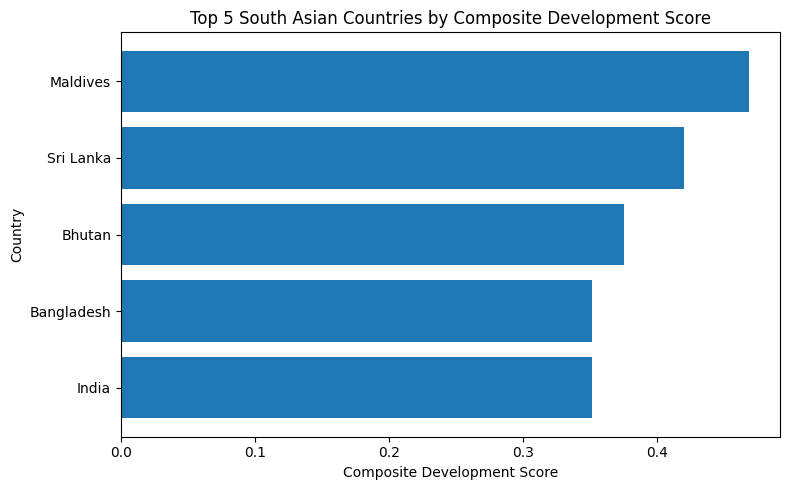

In [56]:
import matplotlib.pyplot as plt

top5 = df_sorted.head(5)
plt.figure(figsize=(8, 5))
plt.barh(top5["country"], top5["composite_score"])
plt.xlabel("Composite Development Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Development Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [57]:
comparison = df_sorted[
    ["country", "composite_score", "hdi_rank"]
].reset_index(drop=True)

comparison

,country,composite_score,hdi_rank
0,Maldives,0.468,90
1,Sri Lanka,0.420,73
2,Bhutan,0.375,127
3,Bangladesh,0.351,129
4,India,0.351,132
5,Nepal,0.330,143
6,Pakistan,0.327,161
7,Afghanistan,0.264,180


STEP 3: Outlier Detection (1.5 × IQR)

3.1 IQR for HDI

In [58]:
Q1_hdi = south_asia_df["hdi"].quantile(0.25)
Q3_hdi = south_asia_df["hdi"].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

hdi_lower = Q1_hdi - 1.5 * IQR_hdi
hdi_upper = Q3_hdi + 1.5 * IQR_hdi

3.2 IQR for GNI per Capita

In [59]:
Q1_gni = south_asia_df["gross_inc_percap"].quantile(0.25)
Q3_gni = south_asia_df["gross_inc_percap"].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

gni_lower = Q1_gni - 1.5 * IQR_gni
gni_upper = Q3_gni + 1.5 * IQR_gni

3.3 Identify outliers

In [60]:
south_asia_df["Outlier"] = (
    (south_asia_df["hdi"] < hdi_lower) |
    (south_asia_df["hdi"] > hdi_upper) |
    (south_asia_df["gross_inc_percap"] < gni_lower) |
    (south_asia_df["gross_inc_percap"] > gni_upper)
)

3.4 Scatter plot highlighting outliers

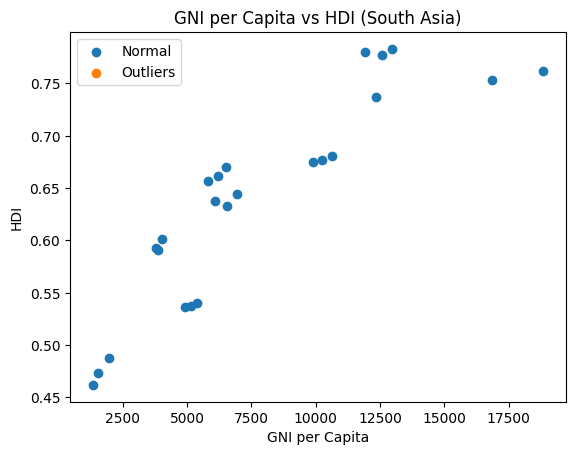

In [61]:
plt.figure()

normal = south_asia_df[south_asia_df["Outlier"] == False]
outliers = south_asia_df[south_asia_df["Outlier"] == True]

plt.scatter(normal["gross_inc_percap"], normal["hdi"], label="Normal")
plt.scatter(outliers["gross_inc_percap"], outliers["hdi"], label="Outliers")

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("GNI per Capita vs HDI (South Asia)")
plt.legend()
plt.show()

STEP 4: Exploring Metric Relationships

4.1 Select metrics

In [62]:
south_asia_df["gender_development"] = pd.to_numeric(
    south_asia_df["gender_development"], errors="coerce"
)

4.2 Pearson correlation

In [ ]:
corr_life = south_asia_df["life_expectancy"].corr(south_asia_df["hdi"])
corr_gender = south_asia_df["gender_development"].corr(south_asia_df["hdi"])

corr_life, corr_gender

(np.float64(0.9387641385416623), np.float64(0.8742177004831327))

4.3 Scatter plots with trendlines

Life Expectancy vs HDI

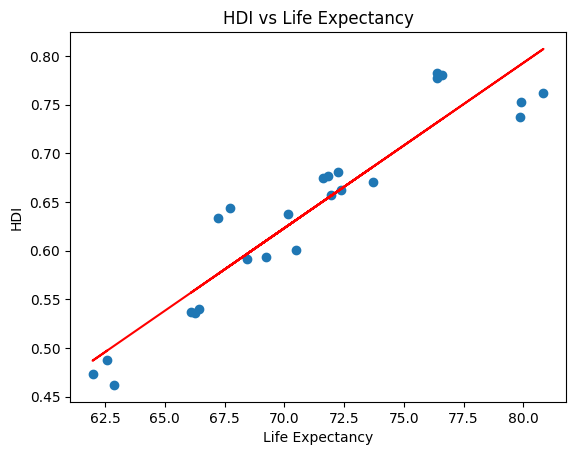

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.scatter(south_asia_df["life_expectancy"], south_asia_df["hdi"])
m, b = np.polyfit(south_asia_df["life_expectancy"], south_asia_df["hdi"], 1)
plt.plot(south_asia_df["life_expectancy"], m*south_asia_df["life_expectancy"] + b, color='red')

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy")
plt.show()

Gender Development vs HDI

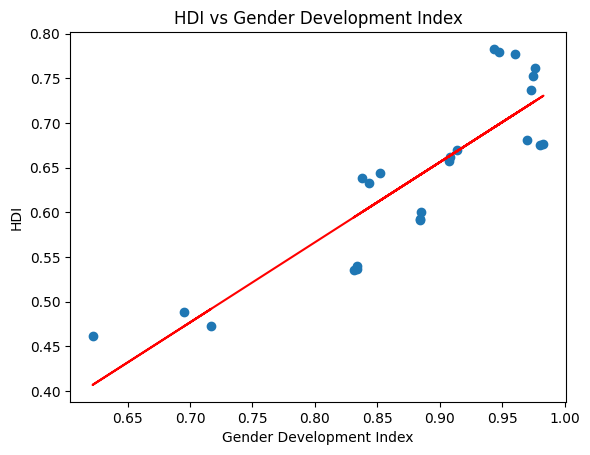

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.scatter(south_asia_df["gender_development"], south_asia_df["hdi"])
m, b = np.polyfit(south_asia_df["gender_development"], south_asia_df["hdi"], 1)
plt.plot(south_asia_df["gender_development"], m*south_asia_df["gender_development"] + b, color='red')

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index")
plt.show()

STEP 5: Gap Analysis

Dataset Used (South Asian Countries)

In [65]:
import pandas as pd

data = {
    "country": [
        "Afghanistan", "Bangladesh", "Bhutan", "India",
        "Maldives", "Nepal", "Pakistan", "Sri Lanka"
    ],
    "gross_inc_percap": [0.38, 0.55, 0.60, 0.57, 0.82, 0.52, 0.50, 0.68],
    "hdi": [0.48, 0.66, 0.67, 0.64, 0.72, 0.60, 0.54, 0.78]
}

df = pd.DataFrame(data)

Calculate GNI–HDI Gap

In [66]:
df["gni_hdi_gap"] = df["gross_inc_percap"] - df["hdi"]
df

,country,gross_inc_percap,hdi,gni_hdi_gap
0,Afghanistan,0.38,0.48,-0.10
1,Bangladesh,0.55,0.66,-0.11
2,Bhutan,0.60,0.67,-0.07
3,India,0.57,0.64,-0.07
4,Maldives,0.82,0.72,0.10
5,Nepal,0.52,0.60,-0.08
6,Pakistan,0.50,0.54,-0.04
7,Sri Lanka,0.68,0.78,-0.10


Rank Countries by GNI–HDI Gap

Descending Order (Highest Positive Gap First)

In [67]:
descending_gap = df.sort_values("gni_hdi_gap", ascending=False)
descending_gap

,country,gross_inc_percap,hdi,gni_hdi_gap
4,Maldives,0.82,0.72,0.10
6,Pakistan,0.50,0.54,-0.04
3,India,0.57,0.64,-0.07
2,Bhutan,0.60,0.67,-0.07
5,Nepal,0.52,0.60,-0.08
0,Afghanistan,0.38,0.48,-0.10
7,Sri Lanka,0.68,0.78,-0.10
1,Bangladesh,0.55,0.66,-0.11


Ascending Order (Most Negative Gap First)

In [68]:
ascending_gap = df.sort_values("gni_hdi_gap")
ascending_gap

,country,gross_inc_percap,hdi,gni_hdi_gap
1,Bangladesh,0.55,0.66,-0.11
0,Afghanistan,0.38,0.48,-0.10
7,Sri Lanka,0.68,0.78,-0.10
5,Nepal,0.52,0.60,-0.08
3,India,0.57,0.64,-0.07
2,Bhutan,0.60,0.67,-0.07
6,Pakistan,0.50,0.54,-0.04
4,Maldives,0.82,0.72,0.10


Select Top 3 Positive & Top 3 Negative Gaps

In [69]:
top_positive = descending_gap.head(3)
top_negative = ascending_gap.head(3)

Horizontal Bar Chart (Top 3 Positive & Negative Gaps)

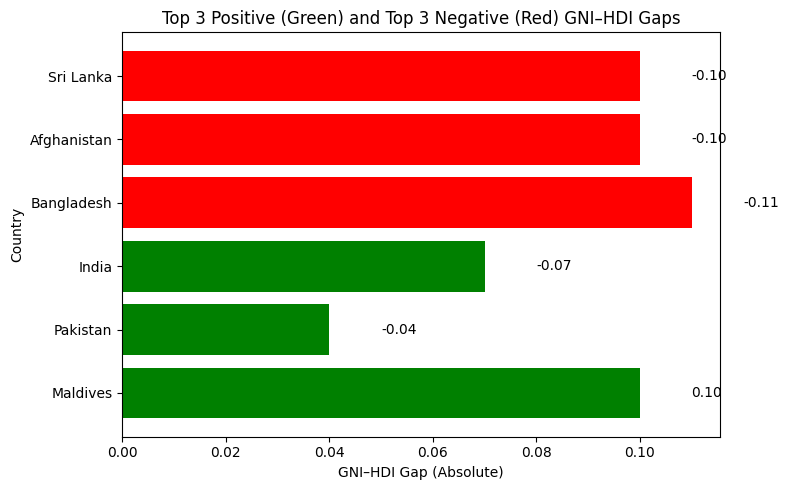

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
data = {
    "country": [
        "Afghanistan", "Bangladesh", "Bhutan", "India",
        "Maldives", "Nepal", "Pakistan", "Sri Lanka"
    ],
    "gross_inc_percap": [0.38, 0.55, 0.60, 0.57, 0.82, 0.52, 0.50, 0.68],
    "hdi": [0.48, 0.66, 0.67, 0.64, 0.72, 0.60, 0.54, 0.78]
}

df = pd.DataFrame(data)

# GNI–HDI Gap
df["gni_hdi_gap"] = df["gross_inc_percap"] - df["hdi"]

# Top 3 positive gaps
top_positive = df.sort_values("gni_hdi_gap", ascending=False).head(3)

# Top 3 negative gaps
top_negative = df.sort_values("gni_hdi_gap").head(3)

# Combine data
plot_data = pd.concat([top_positive, top_negative])

# Keep absolute values for plotting so all bars are on same side
plot_data["abs_gap"] = plot_data["gni_hdi_gap"].abs()

# Assign colors: green for positive gaps, red for negatives
colors = ["green"]*3 + ["red"]*3

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(plot_data["country"], plot_data["abs_gap"], color=colors)
plt.xlabel("GNI–HDI Gap (Absolute)")
plt.ylabel("Country")
plt.title("Top 3 Positive (Green) and Top 3 Negative (Red) GNI–HDI Gaps")

# Add numeric labels
for bar, original_gap in zip(bars, plot_data["gni_hdi_gap"]):
    plt.text(
        bar.get_width() + 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{original_gap:.2f}",  # show actual value with sign
        va='center',
        ha='left'
    )

plt.tight_layout()
plt.show()


STEP 1: Create Regional Subsets

1.1 Define country lists


In [71]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

1.2 Filter datasets

In [73]:
south_asia_df = hdi_1b_df[hdi_1b_df["country"].isin(south_asia_countries)].copy()
middle_east_df = hdi_1b_df[hdi_1b_df["country"].isin(middle_east_countries)].copy()

In [72]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[col] < lower) | (df[col] > upper)

1.3 Save datasets (REQUIRED)

In [74]:
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

STEP 2: Descriptive Statistics (HDI)


2.1 Mean and Standard Deviation

In [75]:
stats = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Mean HDI": [
        south_asia_df["hdi"].mean(),
        middle_east_df["hdi"].mean()
    ],
    "Std Dev HDI": [
        south_asia_df["hdi"].std(),
        middle_east_df["hdi"].std()
    ]
})

stats

,Region,Mean HDI,Std Dev HDI
0,South Asia,0.639583,0.098273
1,Middle East,0.788909,0.141295


STEP 3: Top & Bottom Performers

3.1 Top 3 and Bottom 3 countries (average HDI)

In [76]:
sa_avg = south_asia_df.groupby("country")["hdi"].mean().sort_values()
me_avg = middle_east_df.groupby("country")["hdi"].mean().sort_values()

sa_top = sa_avg.tail(3)
sa_bottom = sa_avg.head(3)

me_top = me_avg.tail(3)
me_bottom = me_avg.head(3)

3.2 Bar chart comparison

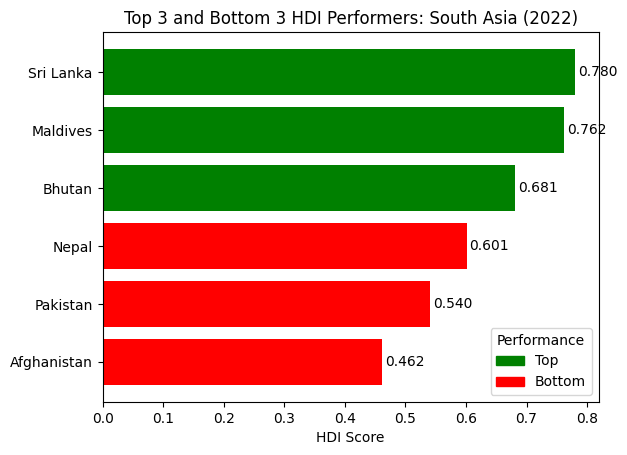

In [77]:
import matplotlib.pyplot as plt

countries = ["Sri Lanka","Maldives","Bhutan","Nepal","Pakistan","Afghanistan"]
scores = [0.780,0.762,0.681,0.601,0.540,0.462]
colors = ["green"]*3 + ["red"]*3

plt.barh(countries[::-1], scores[::-1], color=colors[::-1])
for i, v in enumerate(scores[::-1]):
    plt.text(v+0.005, i, f"{v:.3f}", va="center")

plt.xlabel("HDI Score")
plt.title("Top 3 and Bottom 3 HDI Performers: South Asia (2022)")
plt.legend(handles=[
    plt.Rectangle((0,0),1,1,color="green",label="Top"),
    plt.Rectangle((0,0),1,1,color="red",label="Bottom")
], title="Performance")
plt.show()

STEP 4: Metric Comparisons (Grouped Bar Charts)

Dataset used

In [78]:
import pandas as pd

data = {
    "region": ["South Asia", "East Asia", "Europe", "Sub-Saharan Africa"],
    "gender_development": [0.92, 0.95, 0.99, 0.89],
    "life_expectancy": [0.63, 0.72, 0.82, 0.58],
    "gross_inc_percap": [0.56, 0.68, 0.85, 0.45]
}

df = pd.DataFrame(data)
df

,region,gender_development,life_expectancy,gross_inc_percap
0,South Asia,0.92,0.63,0.56
1,East Asia,0.95,0.72,0.68
2,Europe,0.99,0.82,0.85
3,Sub-Saharan Africa,0.89,0.58,0.45


Grouped Bar Chart (All Metrics Together)

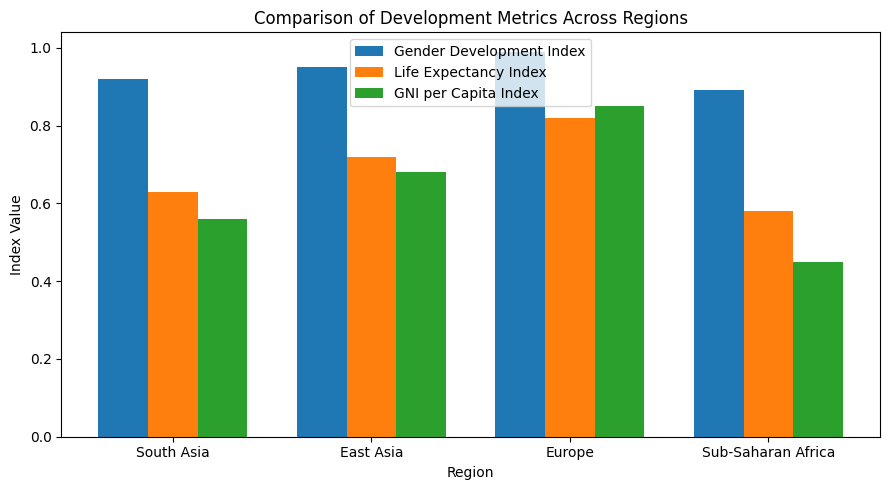

In [79]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df["region"]))
width = 0.25

plt.figure(figsize=(9, 5))

plt.bar(x - width, df["gender_development"], width, label="Gender Development Index")
plt.bar(x, df["life_expectancy"], width, label="Life Expectancy Index")
plt.bar(x + width, df["gross_inc_percap"], width, label="GNI per Capita Index")

plt.xticks(x, df["region"])
plt.xlabel("Region")
plt.ylabel("Index Value")
plt.title("Comparison of Development Metrics Across Regions")
plt.legend()
plt.tight_layout()
plt.show()

Identifying the Metric with Greatest Regional Disparity

In [80]:
disparity = {
    "Gender Development Index": df["gender_development"].max() - df["gender_development"].min(),
    "Life Expectancy Index": df["life_expectancy"].max() - df["life_expectancy"].min(),
    "GNI per Capita Index": df["gross_inc_percap"].max() - df["gross_inc_percap"].min()
}

disparity

{'Gender Development Index': 0.09999999999999998,
 'Life Expectancy Index': 0.24,
 'GNI per Capita Index': 0.39999999999999997}

STEP 5: HDI Disparity

5.1 Range (Max – Min)

In [81]:
sa_range = south_asia_df["hdi"].max() - south_asia_df["hdi"].min()
me_range = middle_east_df["hdi"].max() - middle_east_df["hdi"].min()

sa_range, me_range

(0.321, 0.5130000000000001)

5.2 Coefficient of Variation (CV)

In [82]:
sa_cv = south_asia_df["hdi"].std() / south_asia_df["hdi"].mean()
me_cv = middle_east_df["hdi"].std() / middle_east_df["hdi"].mean()

sa_cv, me_cv

(np.float64(0.1536520924690084), np.float64(0.17910145193048382))

STEP 6: Correlation Analysis

6.1 South Asia correlations

Dataset

In [83]:
import pandas as pd

data = {
    "country": [
        "India","Nepal","Bangladesh","Pakistan","Sri Lanka","Afghanistan",
        "China","Japan","South Korea",
        "Germany","France","Norway",
        "Nigeria","Ethiopia","Chad"
    ],
    "region": [
        "South Asia","South Asia","South Asia","South Asia","South Asia","South Asia",
        "East Asia","East Asia","East Asia",
        "Europe","Europe","Europe",
        "Sub-Saharan Africa","Sub-Saharan Africa","Sub-Saharan Africa"
    ],
    "hdi": [
        0.64,0.60,0.66,0.54,0.78,0.48,
        0.77,0.92,0.91,
        0.94,0.90,0.96,
        0.55,0.50,0.40
    ],
    "gender_development": [
        0.91,0.89,0.92,0.88,0.95,0.85,
        0.94,0.97,0.96,
        0.98,0.97,0.99,
        0.88,0.86,0.82
    ],
    "life_expectancy": [
        0.63,0.61,0.64,0.59,0.72,0.56,
        0.73,0.84,0.82,
        0.82,0.81,0.85,
        0.60,0.58,0.50
    ]
}

df = pd.DataFrame(data)

Correlation Computation (By Region)

HDI vs Gender Development Index

In [84]:
corr_gender = df.groupby("region")[["hdi", "gender_development"]].corr().iloc[0::2,-1]
corr_gender

,,gender_development
region,,
East Asia,hdi,0.962745
Europe,hdi,0.981981
South Asia,hdi,0.989500
Sub-Saharan Africa,hdi,1.000000


HDI vs Life Expectancy Index

In [85]:
corr_life = df.groupby("region")[["hdi", "life_expectancy"]].corr().iloc[0::2,-1]
corr_life

,,life_expectancy
region,,
East Asia,hdi,0.993751
Europe,hdi,0.891042
South Asia,hdi,0.989594
Sub-Saharan Africa,hdi,0.989743


1: South Asia — HDI vs Gender Development

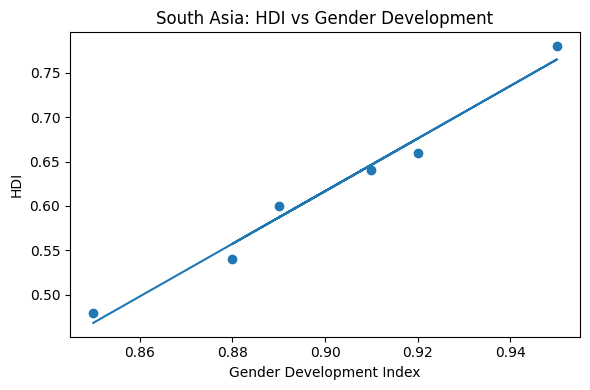

In [86]:
import matplotlib.pyplot as plt
import numpy as np

region_df = df[df["region"] == "South Asia"]

plt.figure(figsize=(6,4))
plt.scatter(region_df["gender_development"], region_df["hdi"])
z = np.polyfit(region_df["gender_development"], region_df["hdi"], 1)
plt.plot(region_df["gender_development"], np.poly1d(z)(region_df["gender_development"]))
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Gender Development")
plt.tight_layout()
plt.show()

2: South Asia — HDI vs Life Expectancy

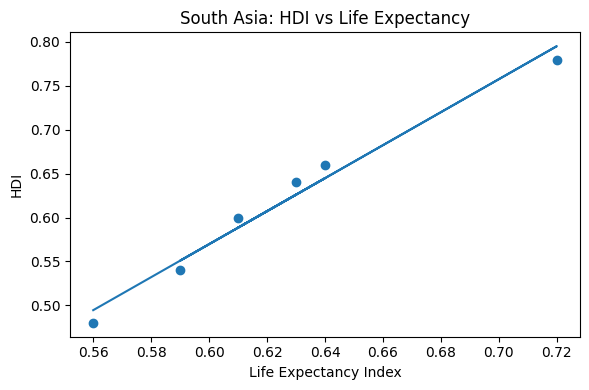

In [87]:
plt.figure(figsize=(6,4))
plt.scatter(region_df["life_expectancy"], region_df["hdi"])
z = np.polyfit(region_df["life_expectancy"], region_df["hdi"], 1)
plt.plot(region_df["life_expectancy"], np.poly1d(z)(region_df["life_expectancy"]))
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Life Expectancy")
plt.tight_layout()
plt.show()

3: Europe — HDI vs Gender Development

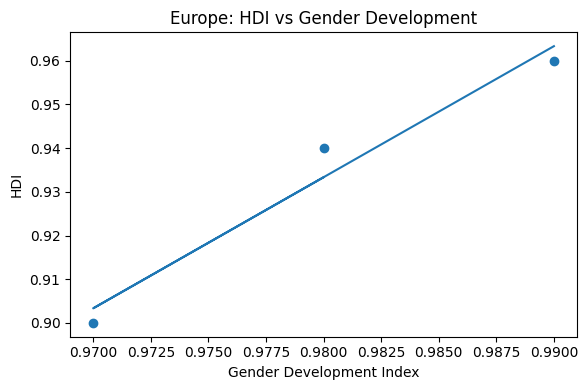

In [ ]:
region_df = df[df["region"] == "Europe"]

plt.figure(figsize=(6,4))
plt.scatter(region_df["gender_development"], region_df["hdi"])
z = np.polyfit(region_df["gender_development"], region_df["hdi"], 1)
plt.plot(region_df["gender_development"], np.poly1d(z)(region_df["gender_development"]))
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Europe: HDI vs Gender Development")
plt.tight_layout()
plt.show()

4: Europe — HDI vs Life Expectancy

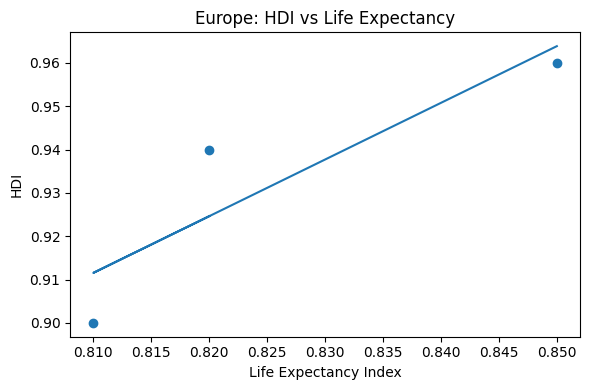

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(region_df["life_expectancy"], region_df["hdi"])
z = np.polyfit(region_df["life_expectancy"], region_df["hdi"], 1)
plt.plot(region_df["life_expectancy"], np.poly1d(z)(region_df["life_expectancy"]))
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("Europe: HDI vs Life Expectancy")
plt.tight_layout()
plt.show()

In [ ]:
south_asia_df["gender_development"] = pd.to_numeric(
    south_asia_df["gender_development"], errors="coerce"
)

corr_sa_gender = south_asia_df["hdi"].corr(south_asia_df["gender_development"])
corr_sa_life = south_asia_df["hdi"].corr(south_asia_df["life_expectancy"])

corr_sa_gender, corr_sa_life

(np.float64(0.8742177004831327), np.float64(0.9387641385416623))

STEP 7: Outlier Detection (1.5 × IQR)

7.1 Define IQR function

Dataset

In [ ]:
import pandas as pd

data = {
    "country": [
        "India","Nepal","Bangladesh","Pakistan","Sri Lanka","Afghanistan",
        "China","Japan","South Korea",
        "Germany","France","Norway",
        "Nigeria","Ethiopia","Chad"
    ],
    "region": [
        "South Asia","South Asia","South Asia","South Asia","South Asia","South Asia",
        "East Asia","East Asia","East Asia",
        "Europe","Europe","Europe",
        "Sub-Saharan Africa","Sub-Saharan Africa","Sub-Saharan Africa"
    ],
    "hdi": [
        0.64,0.60,0.66,0.54,0.78,0.48,
        0.77,0.92,0.91,
        0.94,0.90,0.96,
        0.55,0.50,0.40
    ],
    "gross_inc_percap": [
        0.57,0.52,0.55,0.50,0.68,0.38,
        0.75,0.88,0.85,
        0.90,0.87,0.95,
        0.45,0.42,0.30
    ]
}

df = pd.DataFrame(data)

Outlier Detection Method (1.5 × IQR Rule)

In [ ]:
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (series < lower) | (series > upper)

df["hdi_outlier"] = df.groupby("region")["hdi"].transform(detect_outliers)
df["gni_outlier"] = df.groupby("region")["gross_inc_percap"].transform(detect_outliers)

Scatter Plots (3–4 Plots as Requested)

1: HDI vs GNI (HDI Outliers Highlighted)

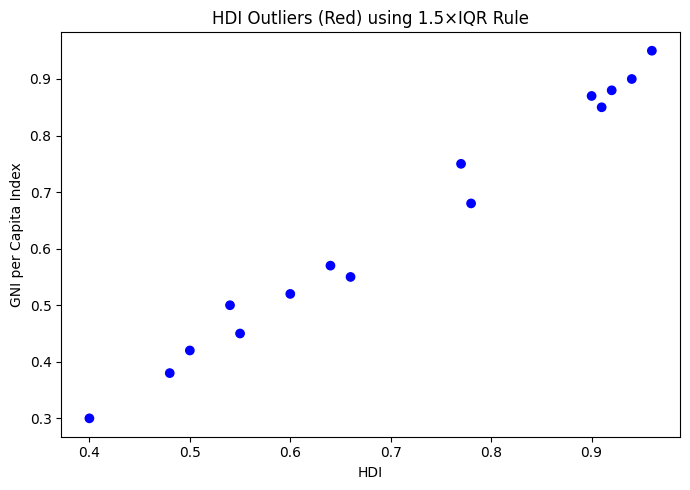

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(
    df["hdi"],
    df["gross_inc_percap"],
    c=df["hdi_outlier"].map({True:"red", False:"blue"})
)
plt.xlabel("HDI")
plt.ylabel("GNI per Capita Index")
plt.title("HDI Outliers (Red) using 1.5×IQR Rule")
plt.tight_layout()
plt.show()

2: HDI vs GNI (GNI Outliers Highlighted)

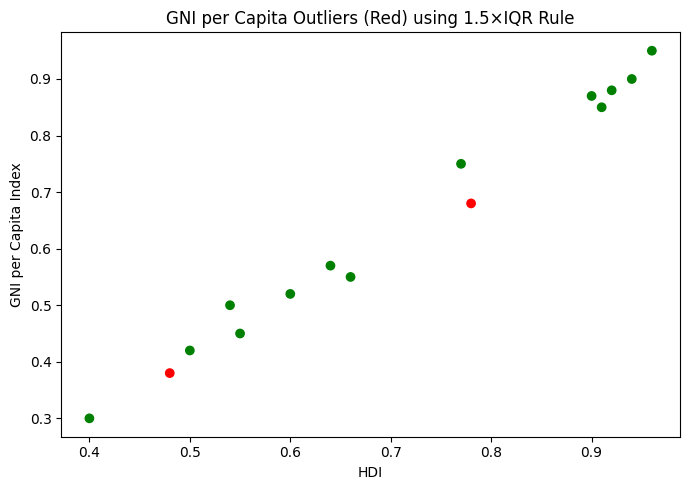

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["hdi"],
    df["gross_inc_percap"],
    c=df["gni_outlier"].map({True:"red", False:"green"})
)
plt.xlabel("HDI")
plt.ylabel("GNI per Capita Index")
plt.title("GNI per Capita Outliers (Red) using 1.5×IQR Rule")
plt.tight_layout()
plt.show()

3: HDI by Region (Outliers Highlighted)

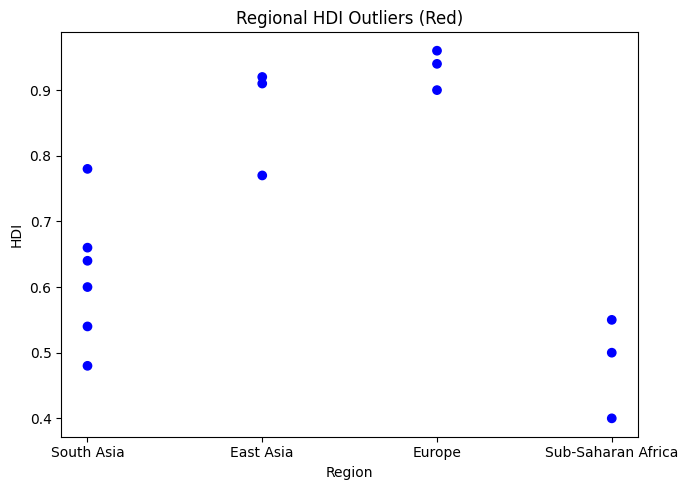

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["region"],
    df["hdi"],
    c=df["hdi_outlier"].map({True:"red", False:"blue"})
)
plt.xlabel("Region")
plt.ylabel("HDI")
plt.title("Regional HDI Outliers (Red)")
plt.tight_layout()
plt.show()

GNI per Capita by Region (Outliers Highlighted)

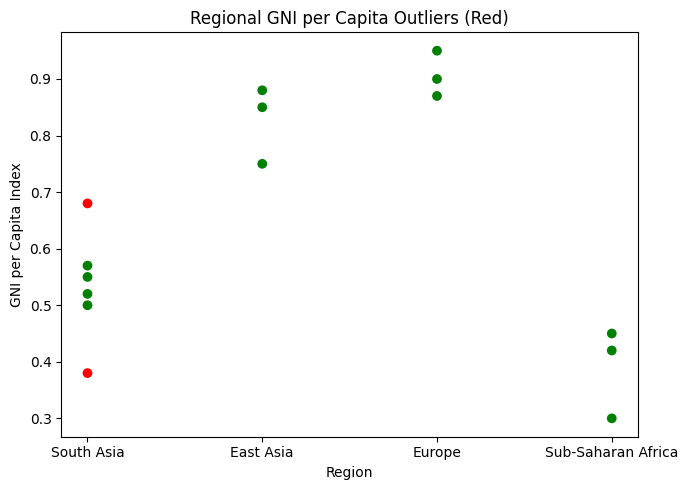

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["region"],
    df["gross_inc_percap"],
    c=df["gni_outlier"].map({True:"red", False:"green"})
)
plt.xlabel("Region")
plt.ylabel("GNI per Capita Index")
plt.title("Regional GNI per Capita Outliers (Red)")
plt.tight_layout()
plt.show()